<a href="https://colab.research.google.com/github/mingyu1021/AI-class/blob/main/11week/creditcard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

# 1. 데이터 로드 및 전처리
# 신용카드 데이터셋을 불러옵니다.

df = pd.read_csv('/content/drive/MyDrive/AI-class/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47623,43281,-0.696585,1.108944,1.413769,-0.127104,0.018555,-0.455078,0.587554,0.113729,-0.121544,...,-0.239606,-0.547457,0.045935,0.029361,-0.228841,0.108686,0.388269,0.173609,5.49,0.0
47624,43282,-0.282262,-1.212401,2.174897,-0.181501,-1.604027,-0.332694,-1.154018,0.223029,0.605392,...,-0.444623,-0.224011,0.728520,0.958983,-0.712869,0.908167,-0.054453,-0.107284,10.00,0.0
47625,43282,-1.513495,-0.206282,-0.702405,1.056423,1.058711,-0.708973,0.611571,0.249949,-0.844057,...,0.089904,0.723147,1.244035,-0.526450,-0.267320,-0.336504,0.398350,-0.017047,89.99,0.0
47626,43282,-0.659193,1.270953,0.946464,-0.370180,1.619207,-0.288297,1.588317,-0.492843,-0.829508,...,-0.060858,-0.028588,-0.704004,-0.971430,1.036058,-0.329102,-0.276970,-0.183521,0.99,0.0


In [ ]:
df.shape

(47628, 31)

In [ ]:
# 결측치 홗인

df.isnull().values.any()

np.True_

In [ ]:
LABELS = ["Normal", "Fraud"]

/tmp/ipython-input-2107955042.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


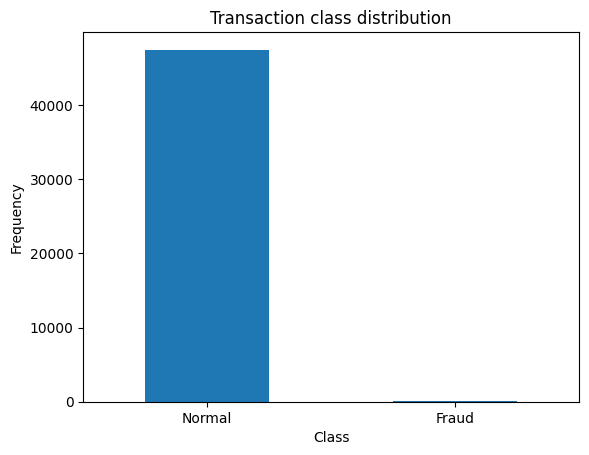

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction class distribution")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency");

In [ ]:
frauds = df[df.Class == 1]
normal = df[df.Class == 0]
frauds.shape

(146, 31)

In [ ]:
normal.shape

(47481, 31)

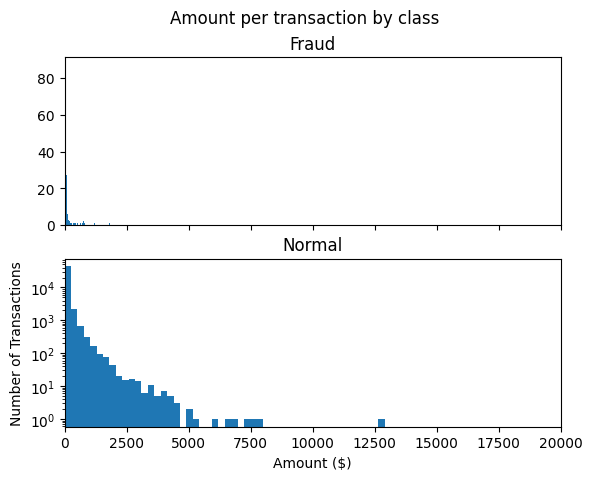

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')

bins = 50

ax1.hist(frauds.Amount, bins = bins)
ax1.set_title('Fraud')

ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

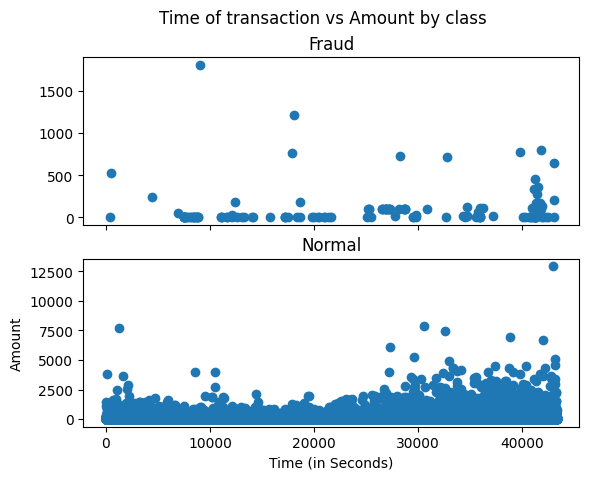

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(frauds.Time, frauds.Amount)
ax1.set_title('Fraud')

ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

data = df.drop(['Time'], axis=1)

data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1, 1))

In [ ]:
RANDOM_SEED = 42

In [ ]:
X_train, X_test = train_test_split(data, test_size=0.2, random_state=RANDOM_SEED)
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)

y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

X_train = X_train.values
X_test = X_test.values

X_train.shape

(37981, 29)

In [ ]:
# 오토인코더 모델

input_dim = X_train.shape[1]
encoding_dim = 14  # 인코딩 차원을 설정 (임의로 설정한 값, 조정 가능)

input_layer = Input(shape=(input_dim,))
encoded = Dense(encoding_dim, activation='relu')(input_layer)
encoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(int(encoding_dim / 2), activation='relu')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(inputs=input_layer, outputs=decoded)
autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# 3. 모델 학습
# 훈련데이터의 0.1 을 validation data로 사용
history = autoencoder.fit(X_train, X_train,
                          epochs=50,
                          batch_size=256,
                          shuffle=True,
                          validation_split = 0.1)

Epoch 1/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 1.2841 - val_loss: 1.1309
Epoch 2/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.1060 - val_loss: 0.9734
Epoch 3/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9703 - val_loss: 0.9217
Epoch 4/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9427 - val_loss: 0.8823
Epoch 5/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9085 - val_loss: 0.8555
Epoch 6/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8573 - val_loss: 0.8435
Epoch 7/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8775 - val_loss: 0.8353
Epoch 8/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8758 - val_loss: 0.8289
Epoch 9/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.8613 - val_loss: 0.8236
Epoch 10/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8652 - val_loss: 0.8201
Epoch 11/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.8856 - val_loss: 0.8176
Epoch 12/50
134/134 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/ste

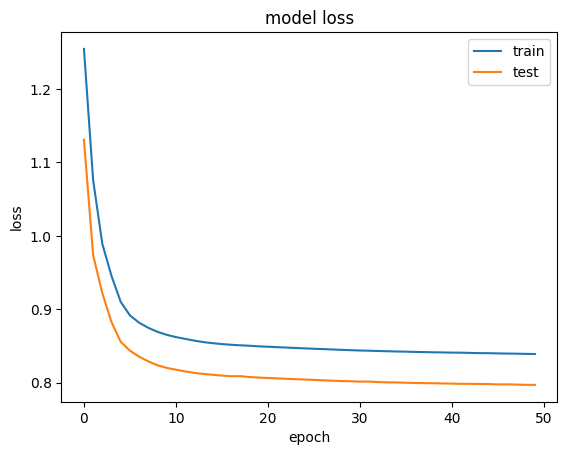

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right');

In [ ]:
# X_test 값을 넣어서 Reconstruction Error 값을 얻고,
# 실제 레이블인 y_test와 데이터프레임으로 구성
# Reconstruction Error + 실제 레이블의 형태가 됨

predictions = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

298/298 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,reconstruction_error,true_class
count,9526.000000,9526.000000
mean,1.015031,0.002729
std,6.579874,0.052175
min,0.060253,0.000000
25%,0.262936,0.000000
50%,0.443340,0.000000
75%,0.711120,0.000000
max,446.039904,1.000000
